In [8]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
plt.style.use("seaborn")

#Portable way of using operating system dependent functionality.OS module in Python provides functions for interacting with the operating system.
import os 
#The name "TAR" refers to Tape Archive files and goes back to when files where stored on tape drives. ... Since TAR files are simply archives, 
#they need to be compressed by another utility,such as gzip, to reduce their size. 
import tarfile 

# 'six' library will help you to write the code that is compatible with both Python 2 and Python 3.Urllib is a package that collects several modules for working with URLs:
from six.moves import urllib

from pandas_profiling import ProfileReport

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
#isdir() method in Python is used to check whether the specified path is an existing directory or not. This method follows symbolic link, 
#that means if the specified path is a symbolic link pointing to a directory then the method will return True.
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
#.requestmodule defines functions and classes which help in opening URLs (mostly HTTP) in a complex world
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
#Extract all members from the archive to the current working directory. path specifies a different directory to extract to. 
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
#This is basically calling the function just defined.
fetch_housing_data()

### Now when you call fetch_housing_data(), it creates a datasets/housing directory in your workspace, downloads the housing.tgz file, and extracts the housing.csv from it in this directory.

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

### This function returns a Pandas DataFrame object containing all the data.

In [5]:
df_housing=load_housing_data()
#to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.
#total_bedrooms attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. All attributes are numerical, 
#except the ocean_proximity field. Its type is object,which means that it is probably a categorical attribute.
df_housing.info()
#summary of the numerical attributes
df_housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [14]:
Report=ProfileReport(df_housing,title='Pandas Profiling Report', explorative=True)
Report.to_notebook_iframe()


Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df_housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

C:\Users\Pedro Romero\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


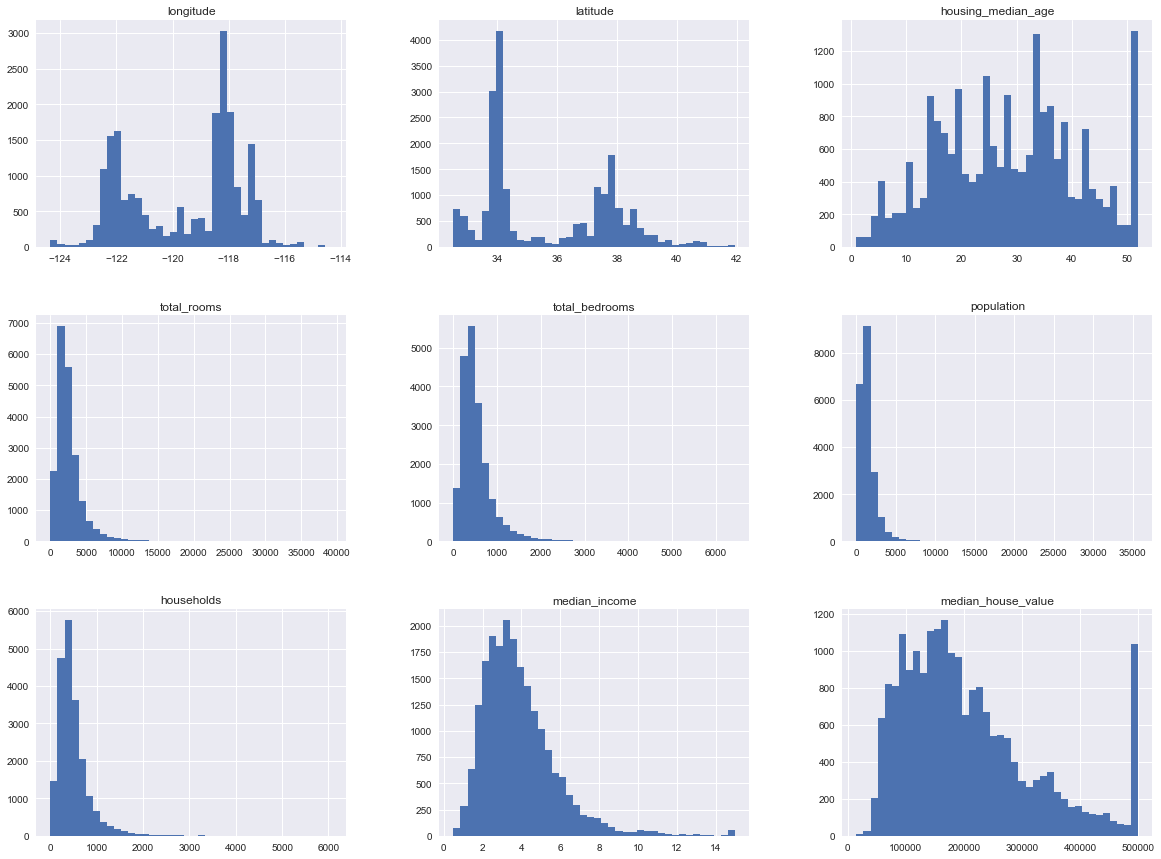

In [6]:
# call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute
%matplotlib inline

import matplotlib.pyplot as plt
df_housing.hist(bins=40, figsize=(20,15))
plt.show();

### You can see that slightly over 800 districts have a median_house_value equal to about $500,000.

#### The median income data has been scaled to some strange units. More than that, it turns out that it is capped at both ends. The highest value is 15 and the lowest is .5. This may create some issues. Let’s create a column that separates income into 5 categories. 

#### Creates an income category attribute by dividing the median income by 1.5 (to limit the number of income categories), and rounding up using ceil (to have discrete categories), and then merging all the categories greater than 5 into category. We’re not actually going to use these categories in visualizing our data, but we are going use them in sampling it.First we scale down the existing income numbers by dividing each by 1.5, for example 7.5/1.5 = 5.0. Then we do some capping of our own. We’ll save all values less than 5 as is and anything greater than 5 is 5. This is done using the where method.

In [7]:
import numpy as np
df_housing["income_cat"] = np.ceil(df_housing["median_income"] / 1.5)
df_housing["income_cat"].where(df_housing["income_cat"] < 5, 5.0, inplace=True)
housing=df_housing.drop("median_income",axis=1)
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_house_value',
       'ocean_proximity', 'income_cat'],
      dtype='object')

# Exploratory Data Analysis (EDA)

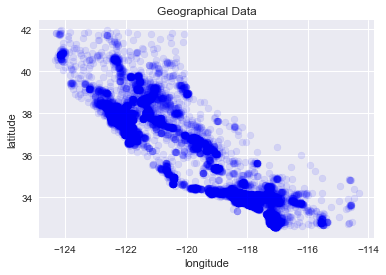

In [8]:
# Setting the parameter alpha enables to indentify areas where there´s a higher concentration of observations
plt.scatter(df_housing["longitude"].values, df_housing["latitude"].values, color="blue",alpha=0.1)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Geographical Data")
plt.show();

C:\Users\Pedro Romero\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


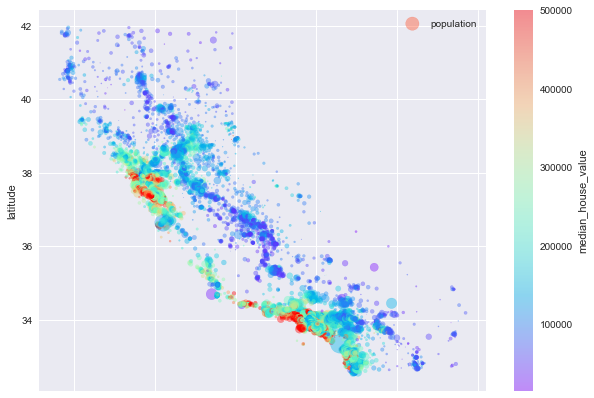

In [9]:
housing.plot(kind="scatter", x="longitude", y="latitude",
    s=housing['population']/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("rainbow"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show();

In [10]:
import seaborn as sns

## Correlation Analysis

In [11]:
corr_matrix=df_housing.corr()
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
income_cat          -0.010690 -0.085528           -0.146920     0.220528   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   
income_cat                0.015662    0.025809    0.038490       0.902750   

                    median_house_value  income_cat  
longitude                    -0.045967   -0.010690  
latitude                     -0.144160   -0.085528  
housing_median_age            0.105623   -0.146920  
total_rooms                   0.134153    0.220528  
total_bedrooms                0.049686    0.015662  
population                   -0.024650    0.025809  
households                    0.065843    0.038490  
median_income                 0.688075    0.902750  
median_house_value            1.000000    0.643892  
income_cat                    0.643892    1.000000

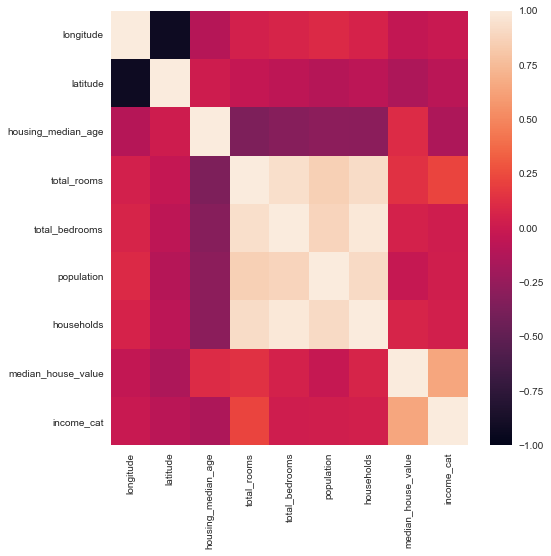

In [12]:
fig=plt.figure(figsize=[8,8])
sns.heatmap(housing.corr(),vmin=-1,vmax=1);


## Regression Analysis 


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
nb_folds = 5

In [14]:
df_housing["Code_Ocean_Proximity"]=pd.factorize(df_housing.ocean_proximity)[0]
df_housing=df_housing.drop("ocean_proximity",axis=1)
df_housing.Code_Ocean_Proximity.value_counts()

1    9136
2    6551
3    2658
0    2290
4       5
Name: Code_Ocean_Proximity, dtype: int64

In [15]:
df_housing.isna().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms          207
population                0
households                0
median_income             0
median_house_value        0
income_cat                0
Code_Ocean_Proximity      0
dtype: int64

In [17]:
df_housing["total_bedrooms"].fillna(bed_median,inplace=True)
df_housing.isna().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
median_house_value      0
income_cat              0
Code_Ocean_Proximity    0
dtype: int64

In [18]:
X=df_housing.drop("median_house_value",axis=1)
y=df_housing.median_house_value

In [19]:
#######################
#############################
#Defining the hyperparameteres

#Contrary to decision trees, RandomForests classifiers do not suffer from overfitting since they take the average out of 
#all the predictions. Thus, although when using Dec.Trees classifiers it seems essential to limit the max_depth of the tree
# in this case I´ve decided not to limit the size of the trees in order to obtain the most pure leaves.

#Defining the max number of trees in the forest. A nice trait of RF is that it doesn´t overfit as we use more trees. 
#The way I see it is, the more trees, the stronger the consensus reached by those trees to choose good predictors. 
#However, the bigger the forest the more time it takes to compute the code. Thus, due to computational limitations 
#and after several trials and errors I´ve decided to limit the max size of the forest to 100 trees.
n_estimators = [int(x) for x in np.linspace(10, 100,10)]

#Determining the amount of samples present at each of the nodes. If 1, the different trees will grow in depth, fitting
#too much to the data. If more samples are passed, the decisions at each node wil be computed by the mean of the samples
#present
min_samples_leaf= [int(x) for x in np.linspace(1, 3,3)]


#The hyperparameter grid that will be used by GridSearchCV
param_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
             "min_samples_leaf":min_samples_leaf}


In [20]:
mdl_rdm=RandomForestRegressor(random_state=1)
Cross_mdl_rdm=GridSearchCV(mdl_rdm,param_grid=param_grid,scoring="neg_median_absolute_error",
                     cv=nb_folds,return_train_score=False,
                    n_jobs=-1)

Cross_mdl_rdm.fit(X,y);

#Storing the results in a DF
rdm_rmae_df=pd.DataFrame(Cross_mdl_rdm.cv_results_)


#Creating an empy dataframe to store the selected values of the previous results´ DF
df_errors = pd.DataFrame(index=rdm_rmae_df.param_min_samples_leaf.unique(), columns=rdm_rmae_df.param_n_estimators.unique())
df_errors=df_errors.fillna(0)

#Appending the values of the selected metrics (the mean of it) to the empty DF
for i in range(len(rdm_rmae_df)):
    j=rdm_rmae_df.param_n_estimators[i]
    k=rdm_rmae_df.param_min_samples_leaf[i]
    df_errors.loc[k,j]=rdm_rmae_df.mean_test_score[i]

In [26]:
df_errors

10            20            30            40            50   \
1 -39533.060000 -39037.005000 -39189.013333 -39201.525000 -39556.274000   
2 -39096.695238 -38392.048659 -38570.019523 -38494.726446 -38690.955005   
3 -38279.130592 -38146.314843 -38286.389844 -38118.843449 -38158.160662   

            60            70            80            90            100  
1 -39098.533333 -39182.447143 -39334.081250 -39294.335556 -39198.983000  
2 -38376.477417 -38557.777105 -38727.855590 -38585.142074 -38538.148820  
3 -38105.297698 -38076.494555 -38015.298366 -38116.594479 -38002.758305

## Ridge

In [27]:
alphas=np.linspace(0,1,21)[1:].round(3)
alphas

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [34]:
Hyper_parameters={"alpha":[0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1. ]}

#Creating the class for the ridge regression
mdl_ridge=Ridge(alpha=Hyper_parameters)

#Cross validating using GridSearch
Cross=GridSearchCV(mdl_ridge,Hyper_parameters,scoring="neg_median_absolute_error",cv=nb_folds,return_train_score=False) 
Cross.fit(X,y);

#Creating a DataFrame out of the results of the cross validation performed. If printed such DF it is kind of a score report
results_mse=pd.DataFrame(Cross.cv_results_)
#Out of that DF, I create a pd.Series containing both columns including the alphas and the..........
results_mse_2=results_mse[["param_alpha","mean_test_score"]]
results_mse_2.set_index("param_alpha",inplace=True)
sr_rmse_ridge=pd.Series(results_mse_2.mean_test_score);

#These are the best combination of parameter-score obtained
print("The best parameter selected is","",Cross.best_params_)
print("The score of this parameter using the defined metrics is","",Cross.best_score_)


The best parameter selected is  {'alpha': 0.05}
The score of this parameter using the defined metrics is  -41691.732753430726


In [33]:
#Similar to the previous CV, but in this case computing a different scoring metrics.

Cross_2=GridSearchCV(mdl_ridge,Hyper_parameters,scoring="neg_mean_squared_error",cv=nb_folds,return_train_score=False)
Cross_2.fit(X,y);

#Results DF
mae_df=pd.DataFrame(Cross_2.cv_results_)

#Sr_mae 
results_mae_2=mae_df[["param_alpha","mean_test_score"]]
results_mae_2.set_index("param_alpha",inplace=True)
sr_mae_ridge=pd.Series(results_mae_2.mean_test_score)

print("The best parameter selected is","",Cross_2.best_params_)
print("The score of this parameter using the defined metrics is","",Cross_2.best_score_)

The best parameter selected is  {'alpha': 0.05}
The score of this parameter using the defined metrics is  -5223467441.972829
